# 트리의 앙상블
<hr>

**정형 데이터**(structured data) : 구조화 되어 있어 CSV, DB, Excel로 저장하기 쉬운 데이터 → 앙상블 학습<br>
**비정형 데이터**(unstructured data) : DB나 Excel로 표현하기 어려운 데이터로 텍스트 데이터, 사진, 음악 등이 있음 → 신경망 알고리즘
<br><br>
####**앙상블 학습**
 - Ensemble Learning
 - 더 좋은 예측 결과를 만들기 위해 여러 개의 모델을 훈련하는 머신러닝 알고리즘
 - 정형 데이터를 다루는 데 가장 뛰어난 성과를 내는 알고리즘
 - 대부분 결정 트리를 기반으로 만들어져 있음
 - [배깅과 보깅](https://daebaq27.tistory.com/32)
<br><br>

####**랜덤 포레스트**
 - Random Forest
 - 대표적인 결정 트리 기반의 앙상블 학습 방법
 - 부트스트랩 샘플을 사용하고 랜덤하게 일부 특성을 선택하여 트리를 만드는 것이 특징
 -  랜덤하게 선택한 샘플과 특성을 사용하기 때문에 훈련세트에 과대적합되는 것을 막아준다
 - 검증세트와 테스트세트에서 안정적인 성능을 얻을 수 있다
 - 부트스트랩 샘플(bootstrap sample) : 무작위로 중복을 허용해서 선택한 n개의 데이터를 선택하는 과정으로 샘플링하여 분류한 데이터
 - OOB(out of bag) 샘플 : 부트스트랩 샘플에 포함되지 않은 샘플
```
rf = RandomForestClassifier(oob_score=True, n_jobs=-1, random_state=42)
scores = cross_validate(rf, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))
```

####**엑스트라 트리**
 - Extra Trees
 - 랜덤 포레스트와 비슷하게 결정 트리를 사용하여 앙상블 모델을 만들지만 부트스트랩 샘플을 사용하지 않음
 - 대신 랜덤하게 노드를 분할해 과대적합을 감소
```
et = ExtraTreesClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(et, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))
```

####**그레이디언트 부스팅**
 - Gradient Boostring
 - 랜덤 포레스트나 엑스트라 트리와 달리 결정 트리를 연속적으로 추가하여 손실 함수를 최소화하는 앙상블 방법
 - 훈련 속도가 조금 느리지만 더 좋은 성능을 기대할 수 있음
```
gb = GradientBoostingClassifier(random_state=42)
scores = cross_validate(gb, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))
```

####**히스토그램 기반 그레이디언트 부스팅**
 - Histogram-based Gradient Boosting
 - 그래이디언트 부스팅의 속도를 개선한 것
 - 안정적인 결과와 높은 성능으로 매우 인기가 높음
 - 입력 특성을 256개의 구간으로 나누므로 노드를 분할할 때 최적의 분할을 빠르게 찾을 수 있음
 - 256개의 구간 중에서 하나를 떼어 놓고 누락된 값을 위해서 사용함 → 따라서 입력에 누락된 특성이 있더라도 따로 전처리할 필요가 없음
 ```
hgb = HistGradientBoostingClassifier(random_state=42)
scores = cross_validate(hgb, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))
```

[랜덤 포레스트와 엑스트라 트리의 차이](https://wyatt37.tistory.com/6) <br>
[혼공머신 5-3 정리](https://engine.tistory.com/m/33)

## 랜덤 포레스트

### 1) 데이터 불러와서 훈련 세트와 테스트 세트로 분리

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

wine = pd.read_csv('https://bit.ly/wine_csv_data')

data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

### 2) RandomFrestClassifire 모델을 교차 검증
- RandomFrestClassifire는 기본적으로 100개의 결정 트리를 사용 → n_jobs 매개변수를 -1로 지정하여 모든 CPU 코어를 사용하는 것이 좋음
- return_train_score 매개변수 : True로 지정하면 검증 점수뿐만 아니라 훈련 세트에 대한 점수도 같이 반환 (기본값은 False)

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(rf, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9973541965122431 0.8905151032797809


훈련 세트가 다소 과대적합되었음

In [ ]:
rf.fit(train_input, train_target)
print(rf.feature_importances_)

[0.23167441 0.50039841 0.26792718]


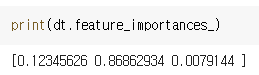

[알코올 도수, 당도, pH] <br>
5-1 결정 트리에서 만든 특성 중요도와 비교해 보면 당도의 중요도가 감소하고 나머니 특성의 중요도가 조금 상승했음 <br>
→ 랜덤 포레스트가 특성의 일부를 랜덤하게 선택하여 결정 트리를 훈련하기 때문 <br>
→ 하나의 특성에 과도하게 집중하지 않고 좀 더 많은 특성이 훈련에 기여할 기회를 얻음 <br>
→ 과대적합을 줄이고 일반화 성능을 높이는 데 도움이 됨

### 3) OOB 샘플을 이용한 자체 평가

**OOB 샘플**
 - 부트스트랩 샘플에 포함되지 않고 남은 샘플
 - OOB 샘플을 사용하여 부트스트랩 샘플로 훈련한 결정 트리를 평가 = 검증 세트 역할
 - OOB 점수를 사용하면 교차 검증을 대신할 수 있어서 결과적으로 훈련 세트에 더 많은 샘플을 사용할 수 있음
 - oob_score 매개변수 : True로 설정 (기본값은 False)

In [ ]:
rf = RandomForestClassifier(oob_score=True, n_jobs=-1, random_state=42)

rf.fit(train_input, train_target)
print(rf.oob_score_)

0.8934000384837406


## 엑스트라 트리

엑스트라 트리 : 하나의 결정 트리에서 특성을 무작위로 분할 <br>
 - splitter='random'인 결정트리를 사용
 - 장점1 : 많은 트리를 앙상블 하기 때문에 과대적합을 막고 검증 세트의 점수를 높임
 - 장점2 : **랜덤하게 노드를 분할**하기 때문에 계산 속도가 빠름 (핸덤 포레스트는 최적의 분할을 찾는 데 시간이 많이 소모됨)
 - 단점1 : 성능이 낮아짐
 - 단점2 : 엑스트라 트리가 무작위성이 좀 더 크기 때문에 랜덤 포레스트보다 더 많은 결정 트리를 훈련해야 함

### ExtraTreesClassifier를 사용한 와인 데이터셋의 교차 검증 점수

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

et = ExtraTreesClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(et, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9974503966084433 0.8887848893166506


In [ ]:
et.fit(train_input, train_target)
print(et.feature_importances_)

[0.20183568 0.52242907 0.27573525]


엑스트라 트리도 결정 트리보다 당도에 대한 의존성이 작은 것을 볼 수 있음
<br>
엑스트라 트리의 회귀 버전은 ExtraTreesRegressor 클래스

## 그레이디언트 부스팅

사이킷런의 GradientBoostingClassifier는 기본적으로 depth가 3인 결정트리를 100개 사용함
<br>
깊이가 얕은 결정 트리를 사용하기 때문에 과대적합에 강하고 일반적으로 높은 일반화 성능을 기대할 수 있음

### 1) GradientBoostingClassifier 모델을 교차 검증

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=42)
scores = cross_validate(gb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.8881086892152563 0.8720430147331015


과대적합이 되지 않았음 <br>
그레이디언트 부스팅은 결정 트리의 개수를 늘려도 과대적합에 매우 강함 <br>
학습률을 증가시키고 트리의 개수를 늘리면 조금 더 성능이 향상될 수 있음

### 2) 결정 트리 개수와 학습률을 늘리고 교차 검증

 - n_esstimators 매개변수 : 결정 트리 개수 (기본값 100)
 - learning_rate 매개변수 : 학습률 (기본값 0.1)
 - subsample 매개변수 : 트리 훈련에 사용한 훈련 세트의 비율(기본값 1로 전체 훈련 세트 사용)

In [ ]:
gb = GradientBoostingClassifier(n_estimators=500, learning_rate=0.2, random_state=42)
scores = cross_validate(gb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9464595437171814 0.8780082549788999


In [ ]:
gb.fit(train_input, train_target)
print(gb.feature_importances_)

[0.15872278 0.68010884 0.16116839]


그레이디언트 부스팅이 랜덤 포레스트보다 일부 특성(당도)에 더 집중한 것을 볼 수 있음

## 히스토그램 기반 그레이디언트 부스팅

사이킷런의 히스토리그램 기반 그레이디언트 부스팅 클래스 - **HistGradientBoostingClassifier**
 - max_iter 매개변수 : 트리의 개수 지정

### 1) HistGradientBoostingClassifier 모델을 교차 검증

In [ ]:
# 사이킷런 1.0 버전 아래에서는 다음 라인의 주석을 해제하고 실행하세요.
# from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

hgb = HistGradientBoostingClassifier(random_state=42)
scores = cross_validate(hgb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9321723946453317 0.8801241948619236


과대적합을 잘 억제하면서 그레디언트 부스팅보다 조금 더 높은 성능을 제공함

### 2) 특성 중요도 출력

permutation_importance() 함수
 - 특성을 하나씩 랜덤하게 섞어서 모델의 성능이 변화하는지를 관찰하여 어떤 특성이 중요한지는 계산
 - 훈련 세트뿐만 아니라 테스트 세트에도 적용할 수 있음
 - n_repeats 매개변수 : 랜덤하게 섞을 횟수 (기본값 5)
 - 반환 : 특성 중요도(importances), 평균(importances_mean), 표준 편차(importances_std)

In [ ]:
from sklearn.inspection import permutation_importance

hgb.fit(train_input, train_target)
# 훈련 세트
result = permutation_importance(hgb, train_input, train_target, n_repeats=10, random_state=42, n_jobs=-1)
print("train :", result.importances_mean)
# 테스트 세트
result = permutation_importance(hgb, test_input, test_target, n_repeats=10, random_state=42, n_jobs=-1)
print("test  :", result.importances_mean)

train : [0.08876275 0.23438522 0.08027708]
test  : [0.05969231 0.20238462 0.049     ]


### 3) 테스트 세트에서의 성능

In [ ]:
hgb.score(test_input, test_target)

0.8723076923076923

###other support library

#### XGBoost
 - tree_method='hist'로 지정하면 히스토그램 기반 레이디언트 부스팅을 사용할 수 있음
 - cross_valiater() 함수와 함께 사용할 수 있음
 - [documentation](https://xgboost.readthedocs.io/en/latest/)

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(tree_method='hist', random_state=42)
scores = cross_validate(xgb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.8824322471423747 0.8726214185237284


#### LightGBM
 - 마이크로소프트에서 만듬
 - [documentation](https://lightgbm.readthedocs.io/en/latest/)

In [ ]:
from lightgbm import LGBMClassifier

lgb = LGBMClassifier(random_state=42)
scores = cross_validate(lgb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9338079582727165 0.8789710890649293
